In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Variable Information

# label :-- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
# msisdn :-- mobile number of user
# aon :-- age on cellular network in days
# daily_decr30 :-- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
# daily_decr90 :-- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
# rental30 :-- Average main account balance over last 30 days
# rental90  :-- Average main account balance over last 90 days
# last_rech_date_ma  :-- Number of days till last recharge of main account
# last_rech_date_da :-- Number of days till last recharge of data account
# last_rech_amt_ma :-- Amount of last recharge of main account (in Indonesian Rupiah)
# cnt_ma_rech30 :-- Number of times main account got recharged in last 30 days
# fr_ma_rech30 :-- Frequency of main account recharged in last 30 days
# sumamnt_ma_rech30  :-- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
# medianamnt_ma_rech30 :-- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
# medianmarechprebal30  :-- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
# cnt_ma_rech90  :-- Number of times main account got recharged in last 90 days
# fr_ma_rech90  :-- Frequency of main account recharged in last 90 days
# sumamnt_ma_rech90  :-- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
# medianamnt_ma_rech90  :-- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
# medianmarechprebal90 :-- Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
# cnt_da_rech30 :-- Number of times data account got recharged in last 30 days
# fr_da_rech30  :-- Frequency of data account recharged in last 30 days
# cnt_da_rech90 :-- Number of times data account got recharged in last 90 days
# fr_da_rech90  :-- Frequency of data account recharged in last 90 days
# cnt_loans30 :-- Number of loans taken by user in last 30 days
# amnt_loans30 :-- Total amount of loans taken by user in last 30 days
# maxamnt_loans30 :-- maximum amount of loan taken by the user in last 30 days
# medianamnt_loans30 :-- Median of amounts of loan taken by the user in last 30 days
# cnt_loans90 :-- Number of loans taken by user in last 90 days
# amnt_loans90 :-- Total amount of loans taken by user in last 90 days
# maxamnt_loans90 :-- maximum amount of loan taken by the user in last 90 days
# medianamnt_loans90 :-- Median of amounts of loan taken by the user in last 90 days
# payback30  :-- Average payback time in days over last 30 days
# payback90 :-- Average payback time in days over last 90 days
# pcircle :-- telecom circle
# pdate  :-- date


In [3]:
#Loading   database
df=pd.read_csv("Data File.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
# Name of the columns
df.columns


Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
# Shape of the database 
df.shape

(209593, 37)

In [6]:
#information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
#finding null values in the database
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
df1 =df.drop(['Unnamed: 0'] , axis=1)
df1

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [9]:
df1.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


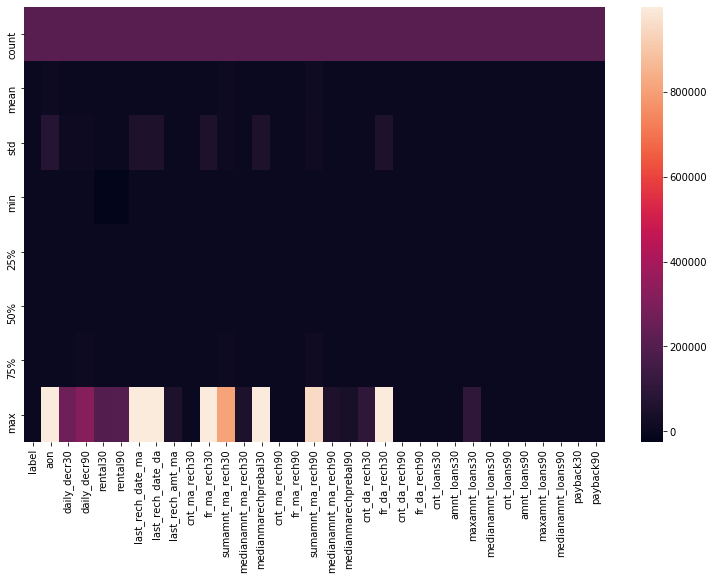

In [10]:
# Making  heatmap of describe.
plt.figure(figsize=(13,8))
sns.heatmap(df1.describe())

<function matplotlib.pyplot.show(*args, **kw)>

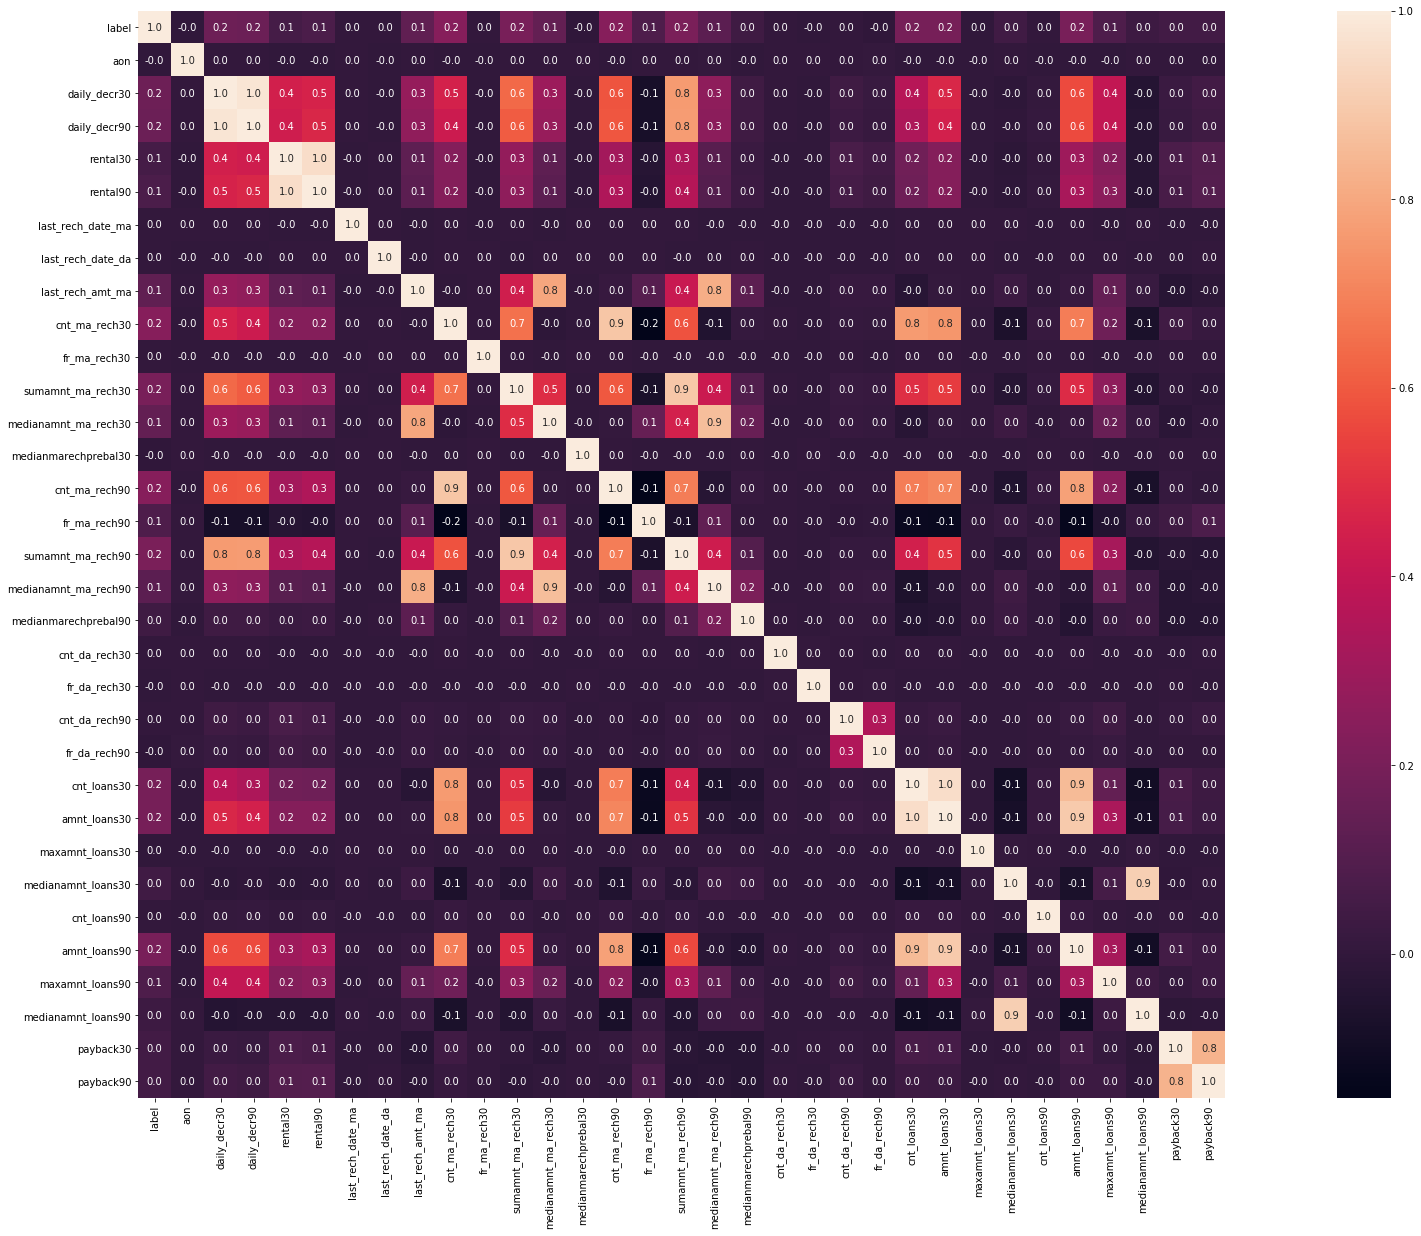

In [11]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True,square=True,fmt=".1f")
plt.show

In [12]:
correlation=df1.corr()
correlation

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


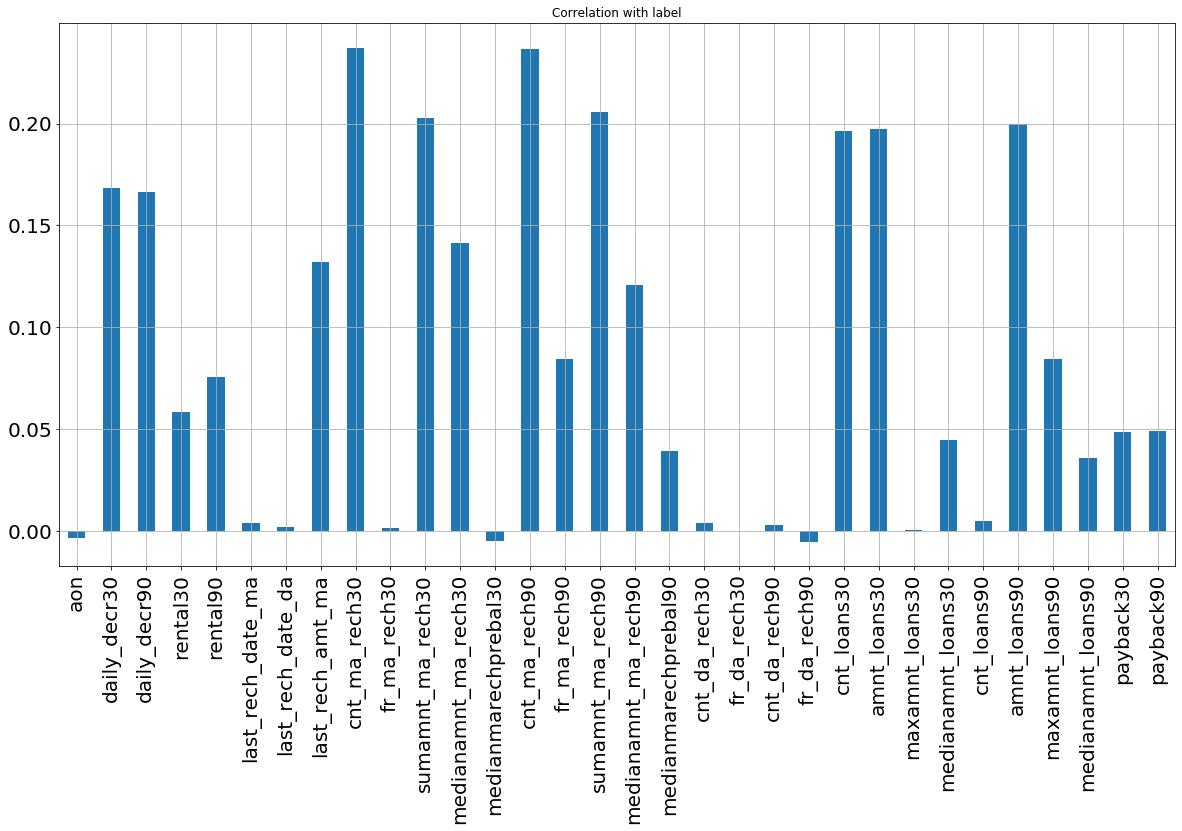

In [13]:
X = df1.drop(['label'],axis=1)
X.corrwith(df1['label']).plot.bar(figsize = (20, 10), title = "Correlation with label", fontsize = 20,rot = 90, grid = True)

In [14]:
# Unique values of all columns
for col in df1:
    print(col)
    print(df[col].unique())
    print('')

label
[0 1]

msisdn
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']

aon
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]

daily_decr30
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]

daily_decr90
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]

rental30
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]

rental90
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]

last_rech_date_ma
[2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]

last_rech_date_da
[0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]

last_rech_amt_ma
[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  193

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_date_ma          AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.656429,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.789286,0.642714;0.110714x0.107857)
medianamnt_ma_rech30       AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.257857,0.5132

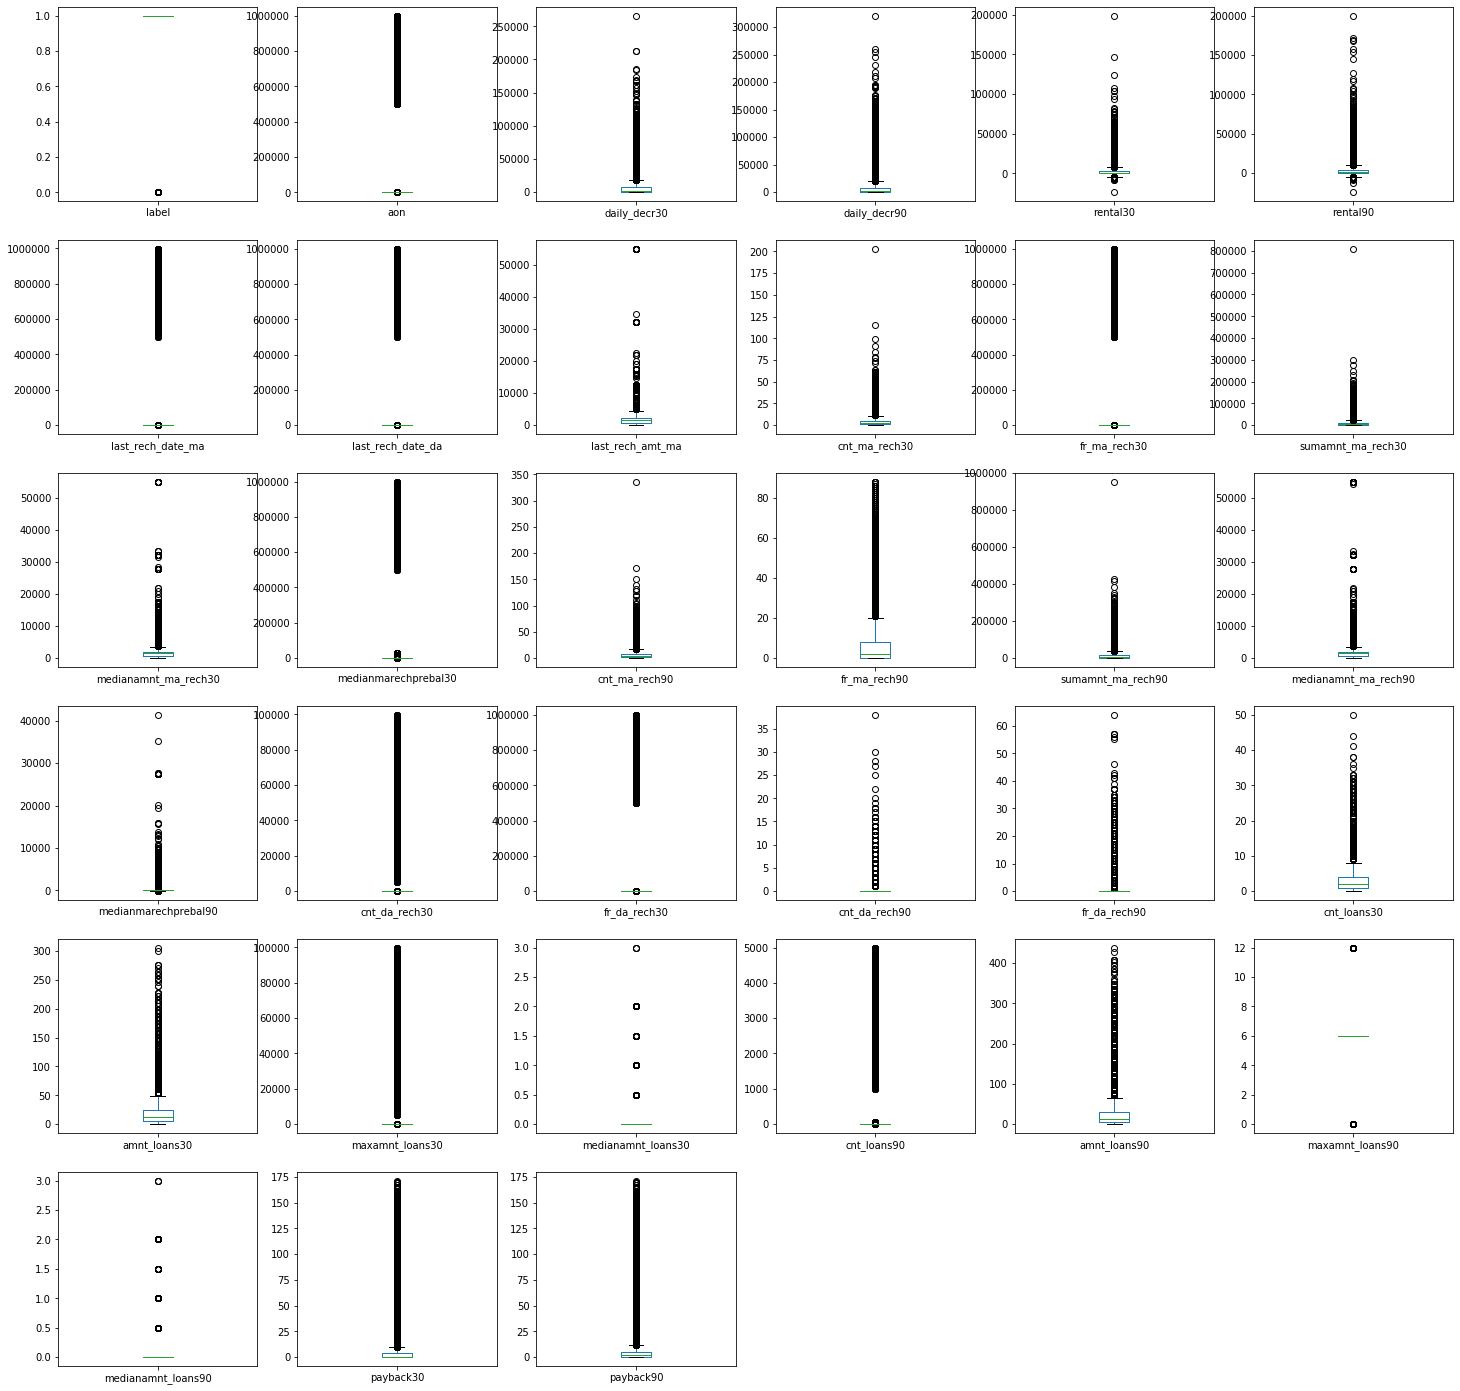

In [15]:

# Making Boxplot of all variables 
df1.plot(kind='box',subplots=True,layout=(6,6),figsize=(25,25))

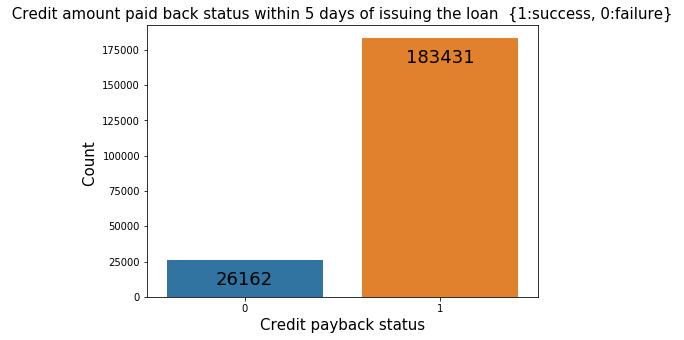

In [16]:
# Countplot of  user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}.
plt.figure(figsize=(7,5))
pd =sns.countplot(x = "label" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Credit payback status", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Credit amount paid back status within 5 days of issuing the loan  {1:success, 0:failure} " , size=15)
plt.show()

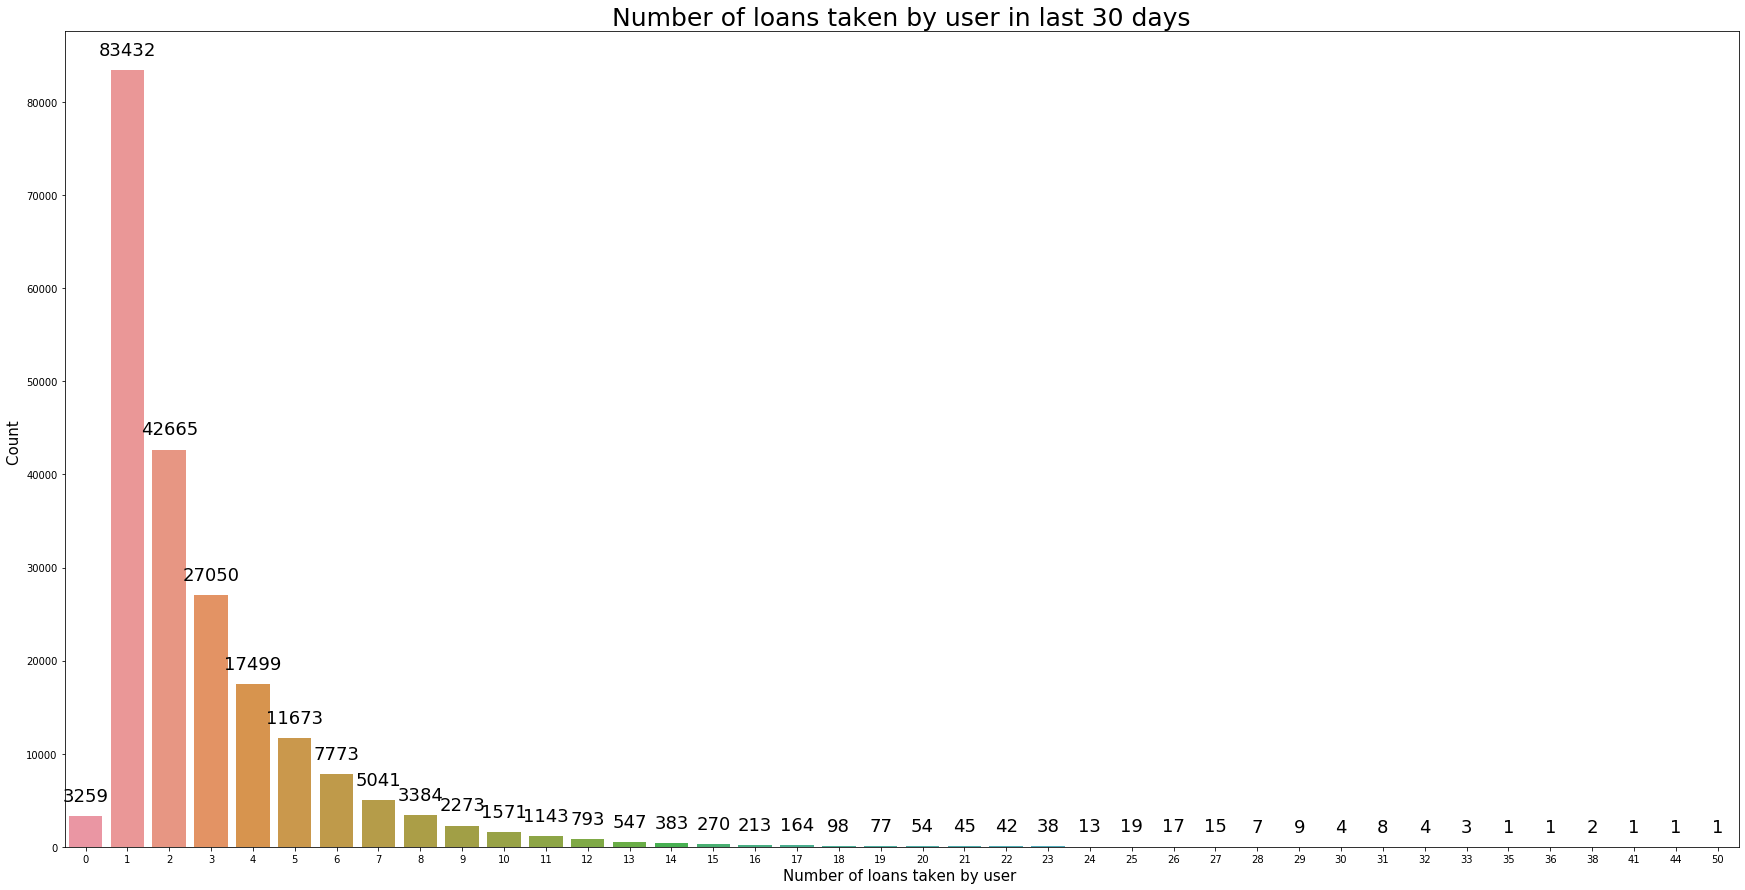

In [17]:
# Countplot of  Number of loans taken by user in last 30 days.
plt.figure(figsize=(30,15))
pd =sns.countplot(x = "cnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xlabel("Number of loans taken by user ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Number of loans taken by user in last 30 days " , size=25)
plt.show()

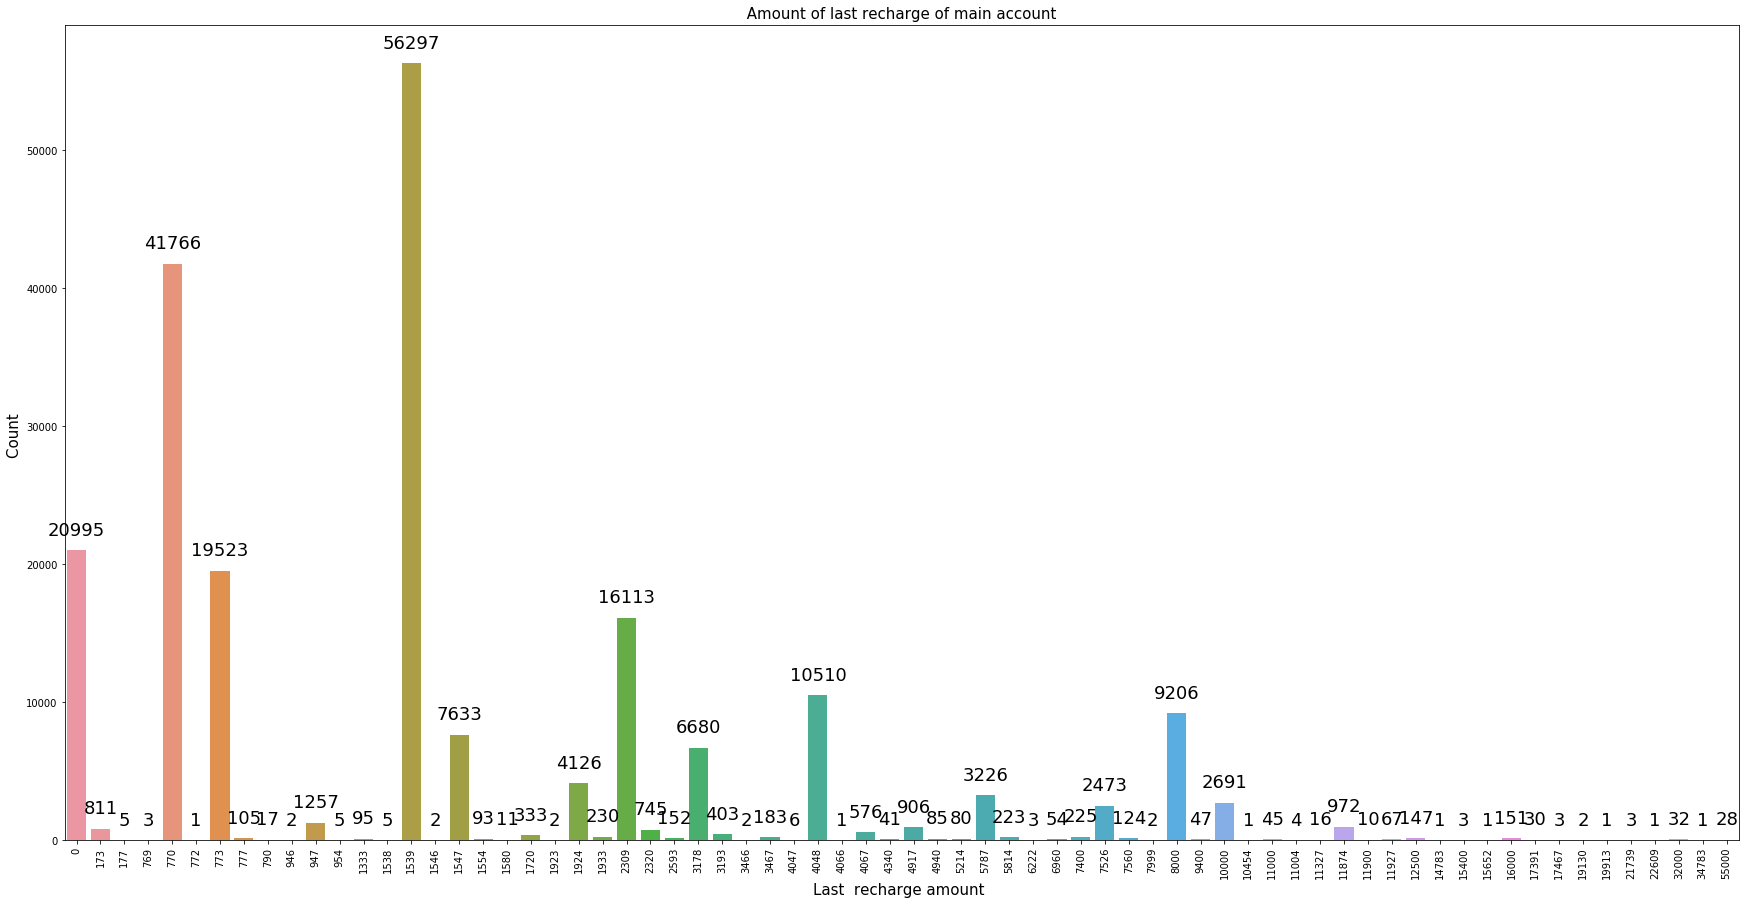

In [18]:
# Countplot of Amount of last recharge of main account .
plt.figure(figsize=(30,15))
pd =sns.countplot(x = "last_rech_amt_ma" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Last  recharge amount ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Amount of last recharge of main account " , size=15)
plt.show()

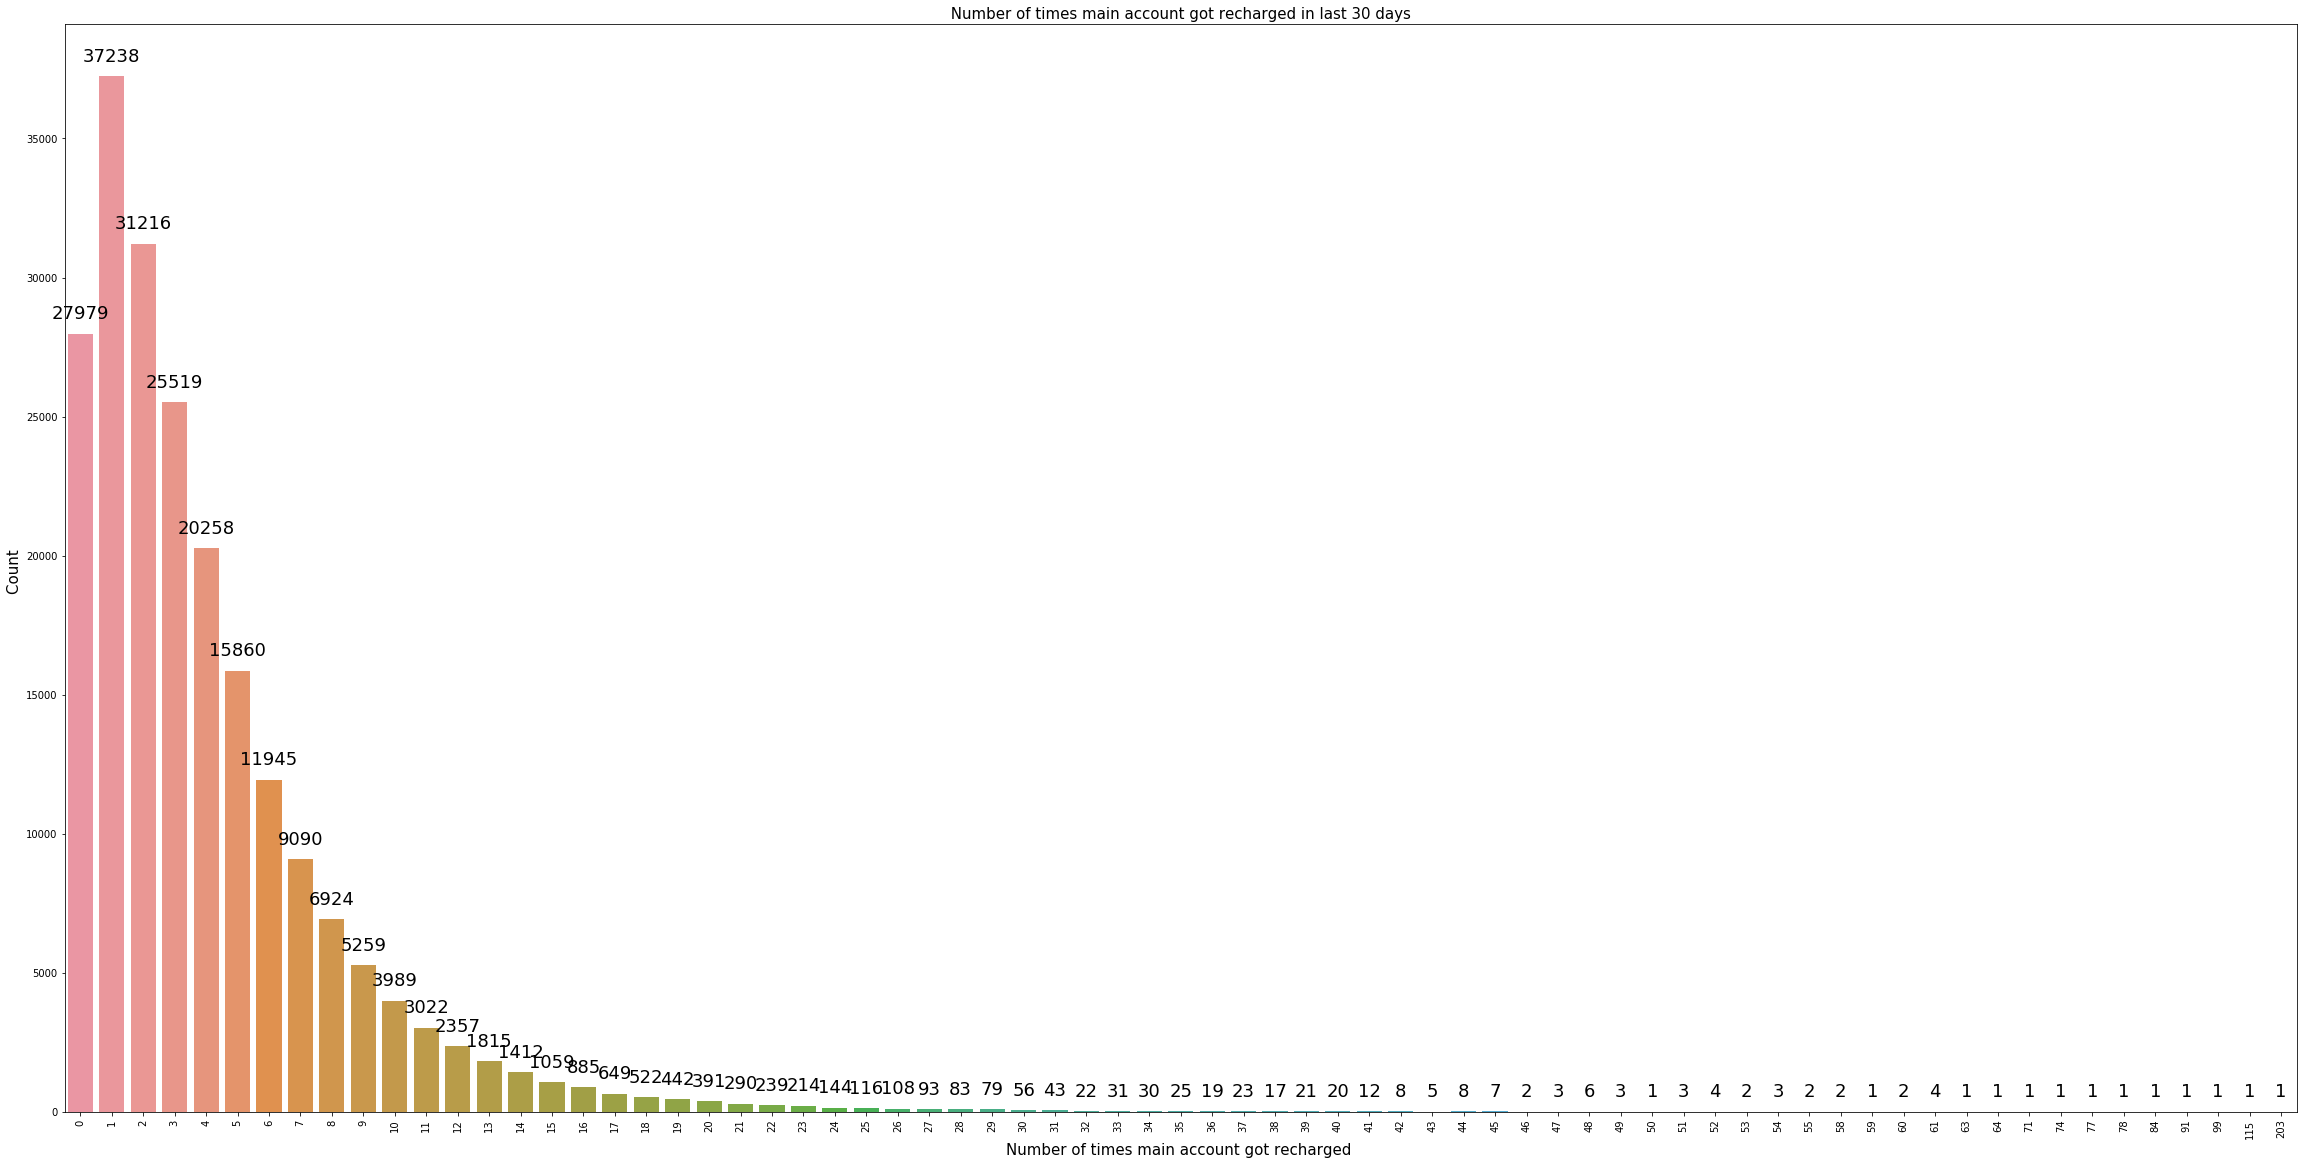

In [19]:
# Countplot of Number of times main account got recharged in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_ma_rech30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of times main account got recharged ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Number of times main account got recharged in last 30 days " , size=15)
plt.show()


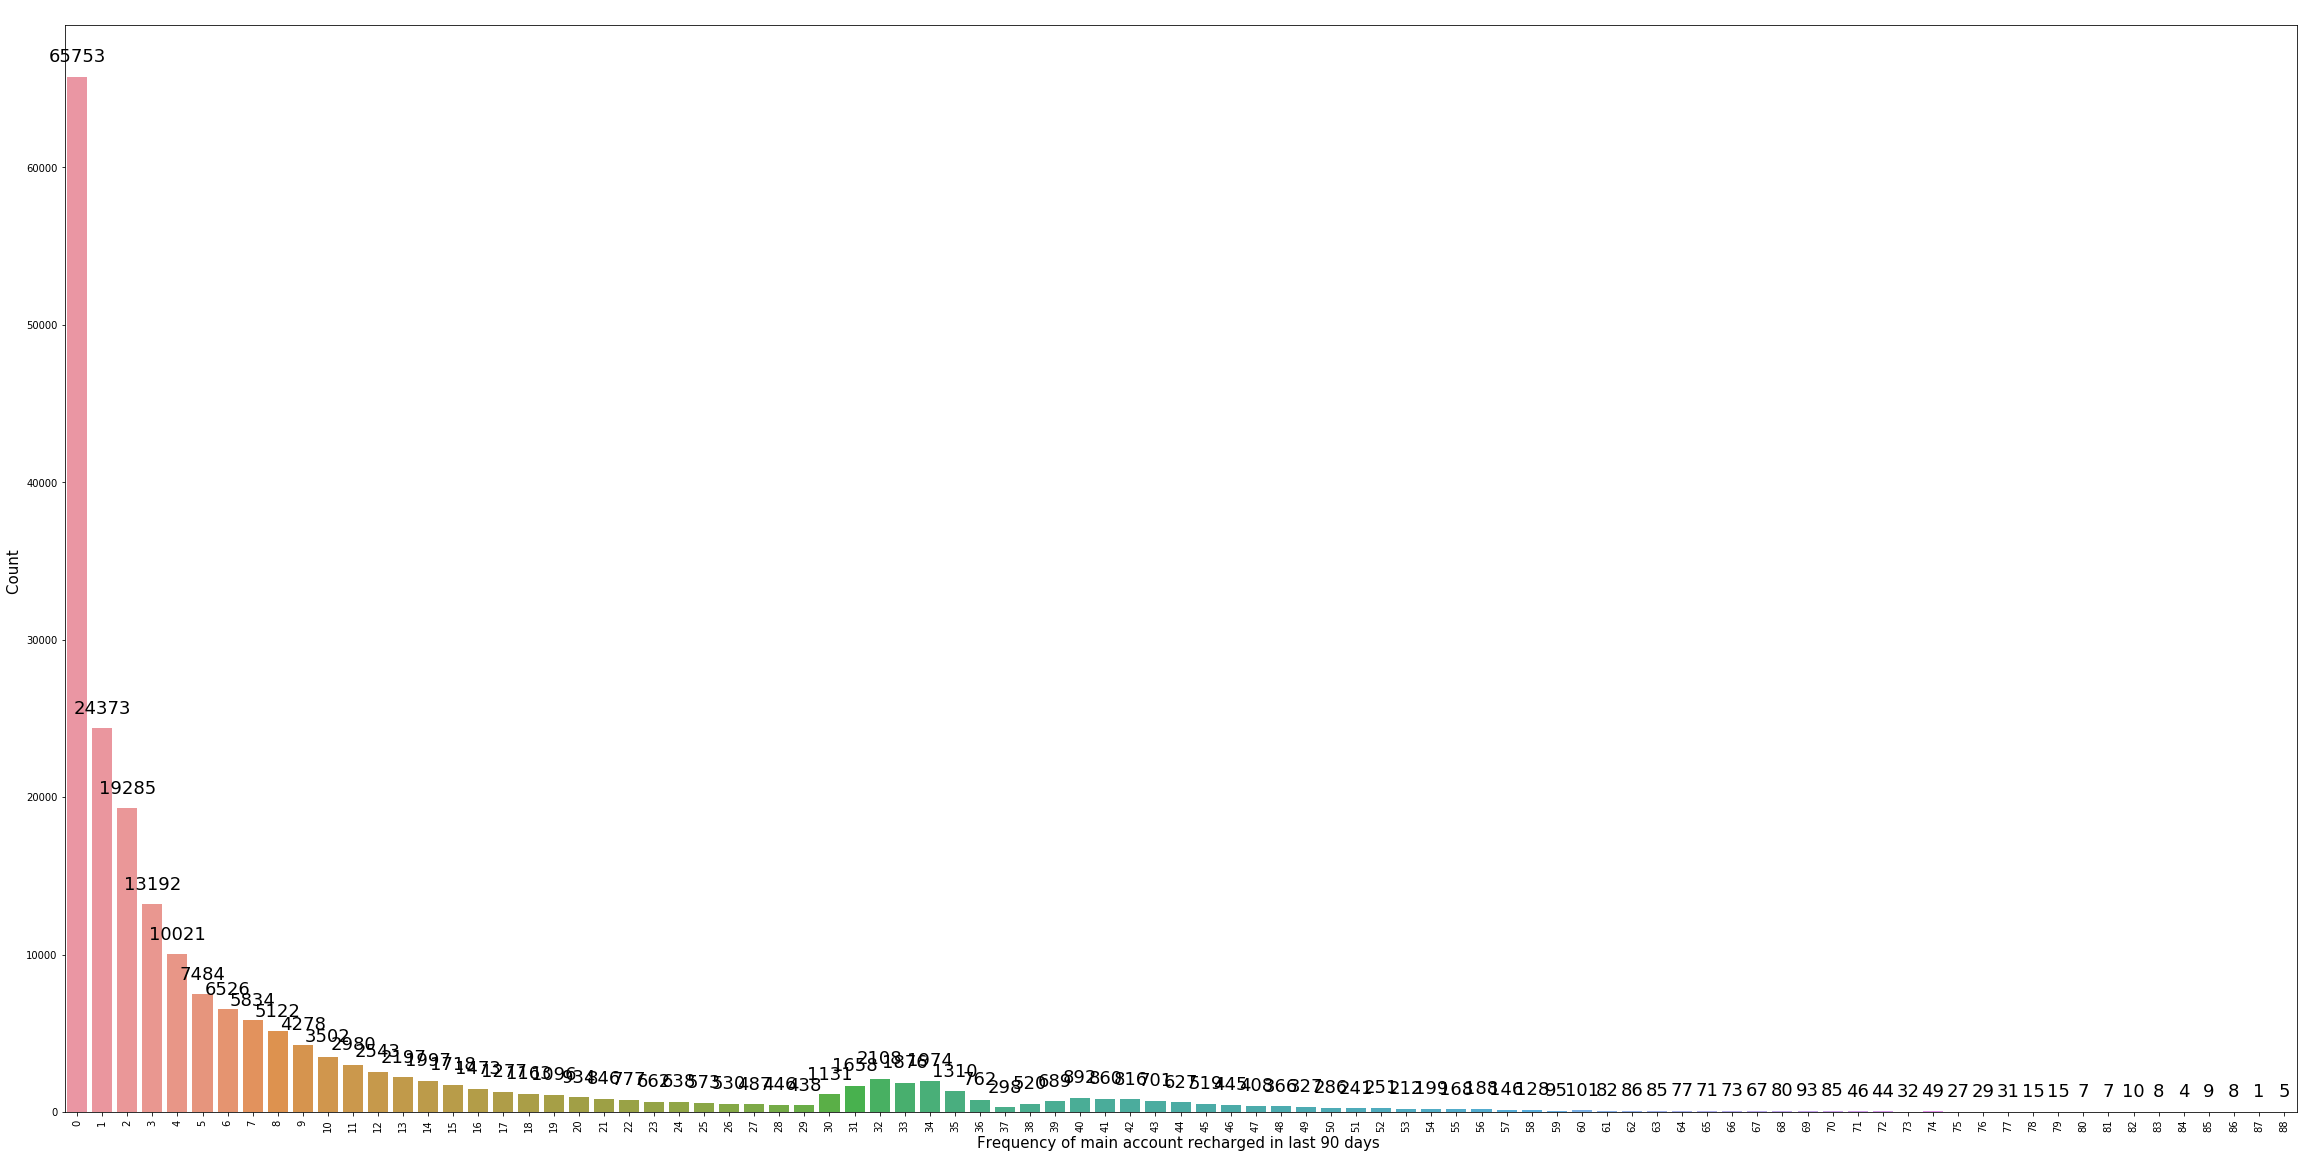

In [20]:
# Countplot of Frequency of main account recharged in last 90 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "fr_ma_rech90" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Frequency of main account recharged in last 90 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

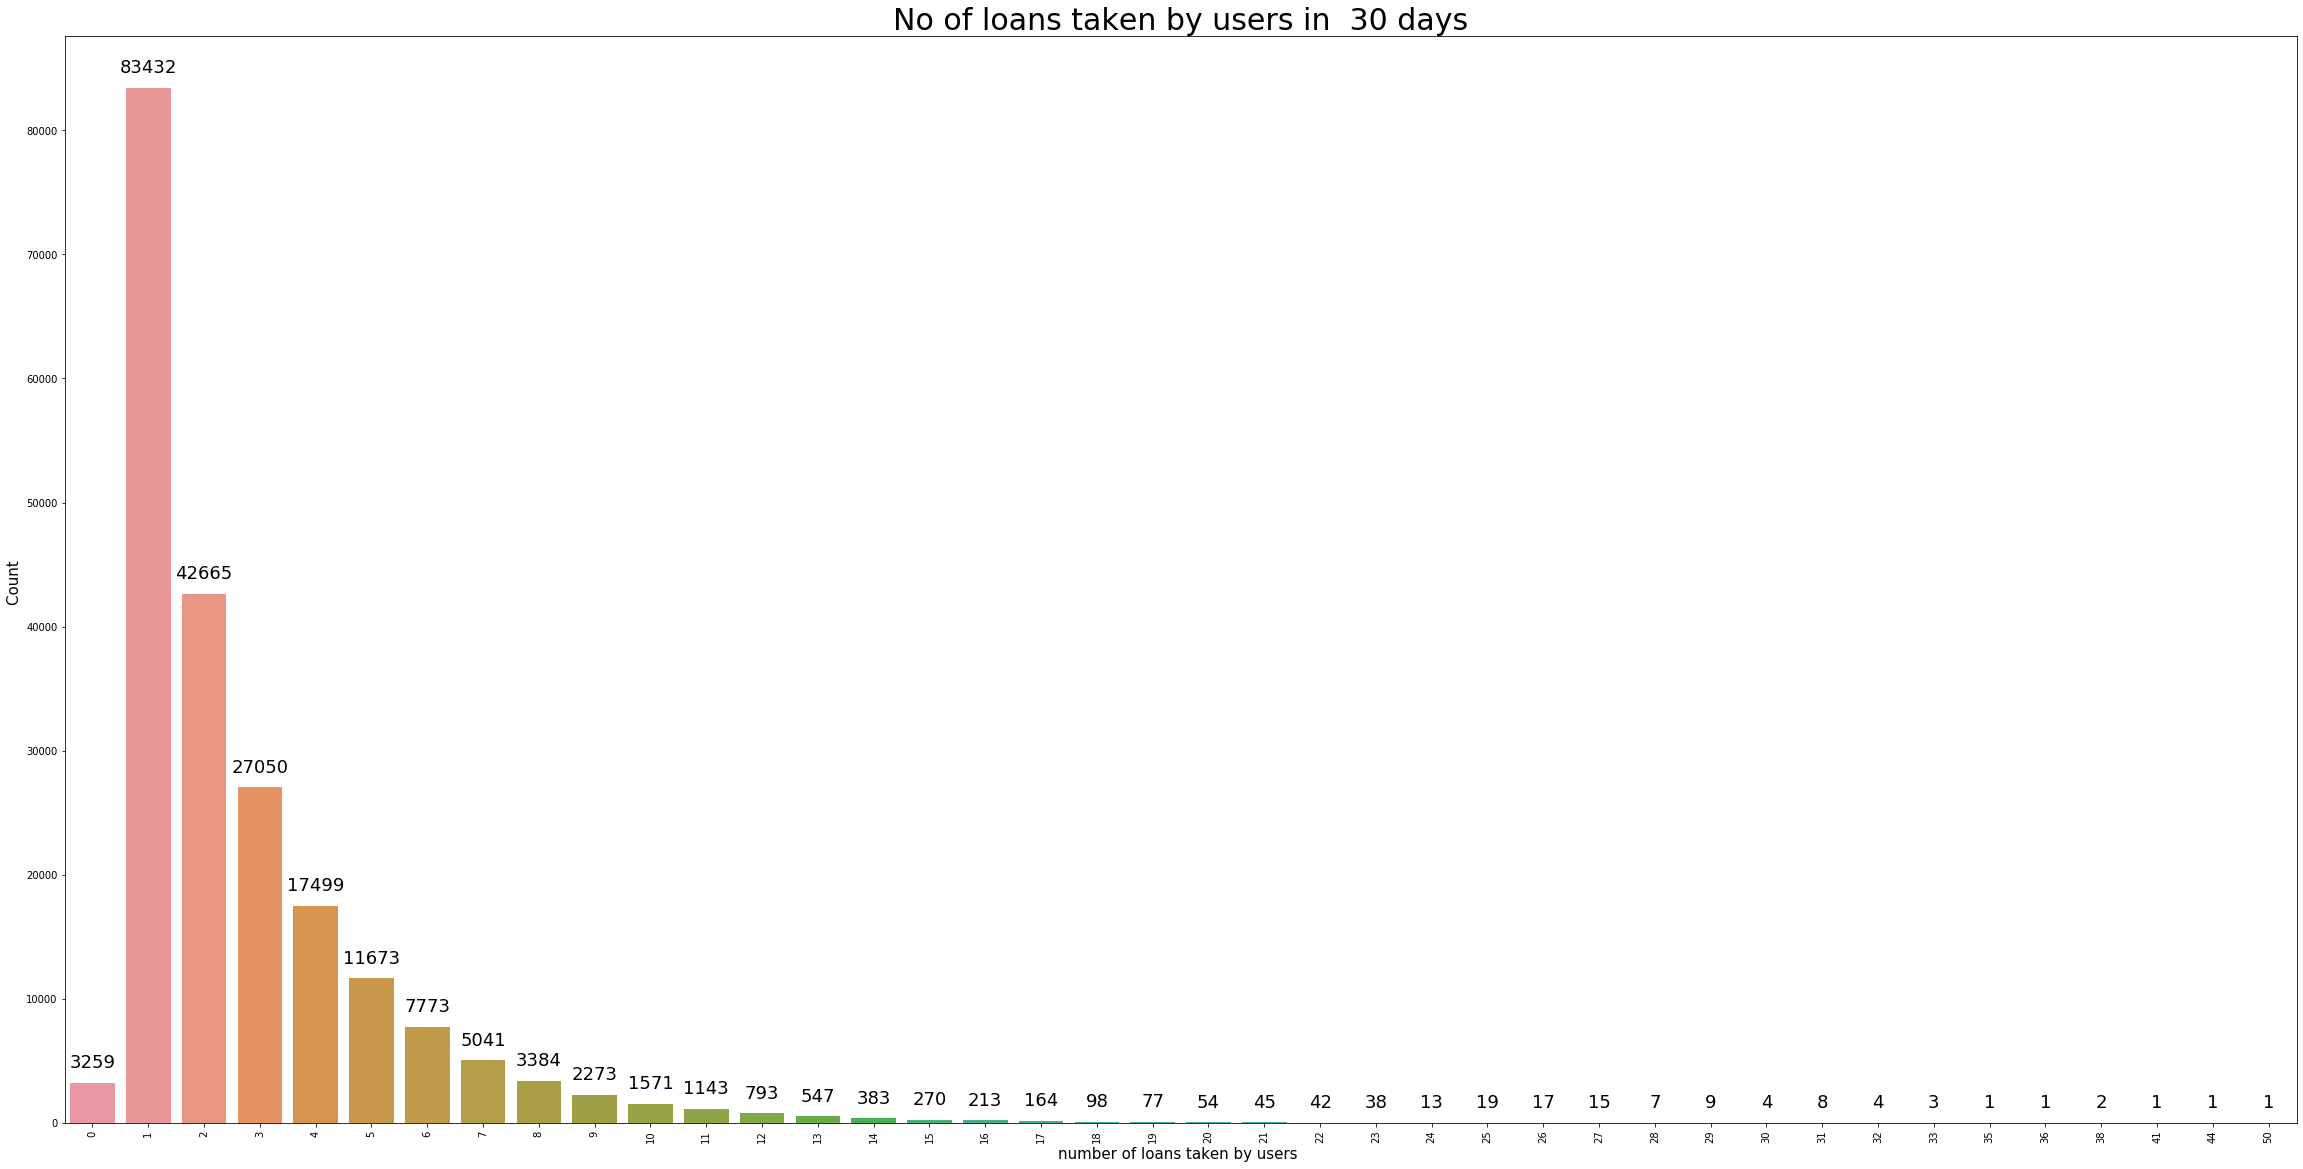

In [21]:
# Countplot of  Number of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("number of loans taken by users ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  No of loans taken by users in  30 days  " , size=30)
plt.show()

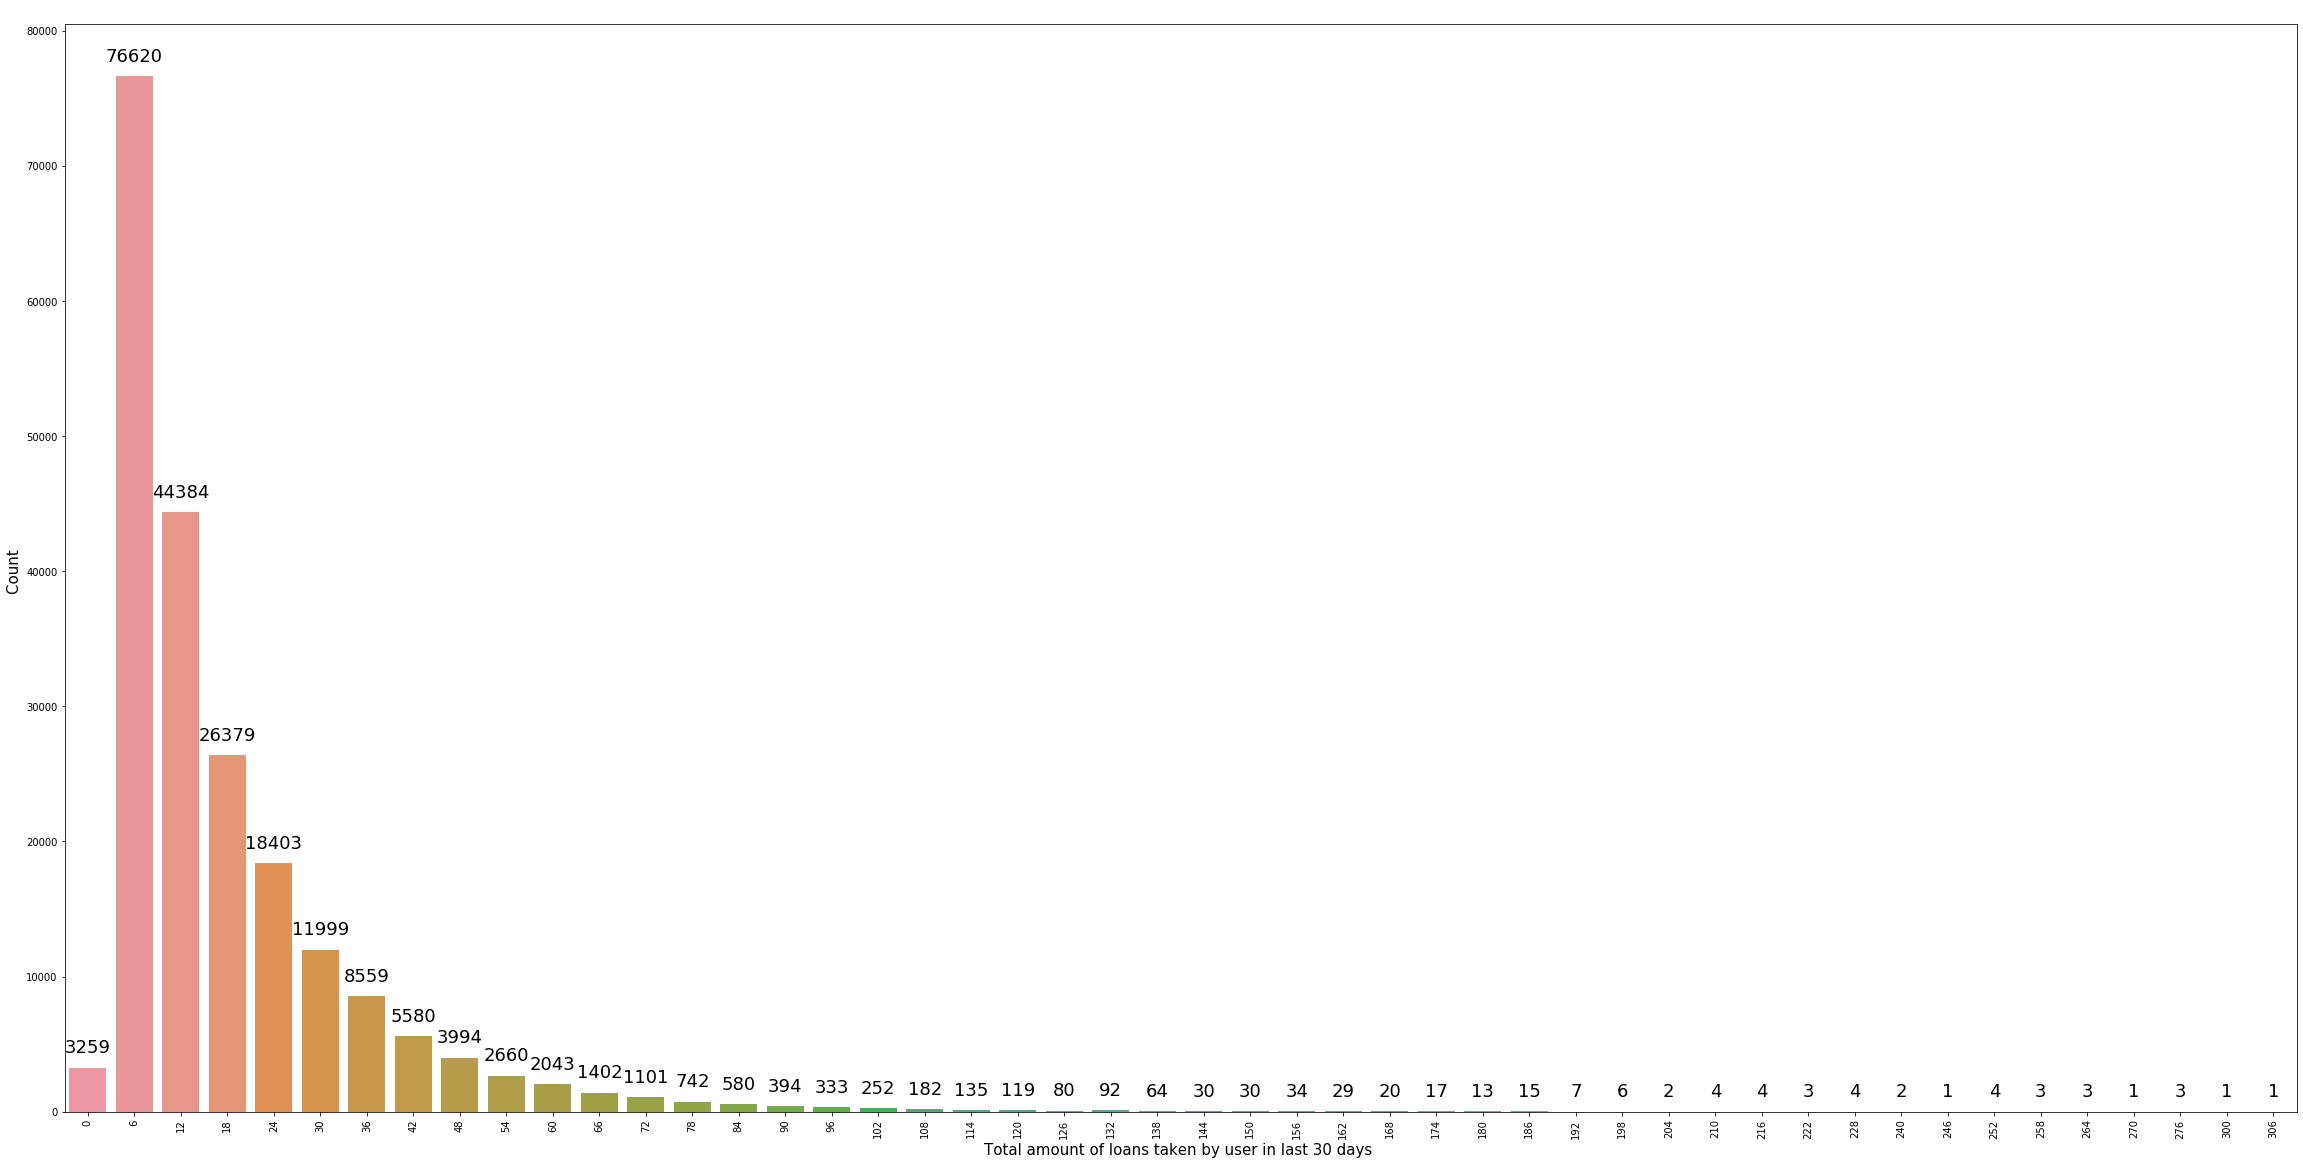

In [22]:
# Countplot of Total amount of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "amnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Total amount of loans taken by user in last 30 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

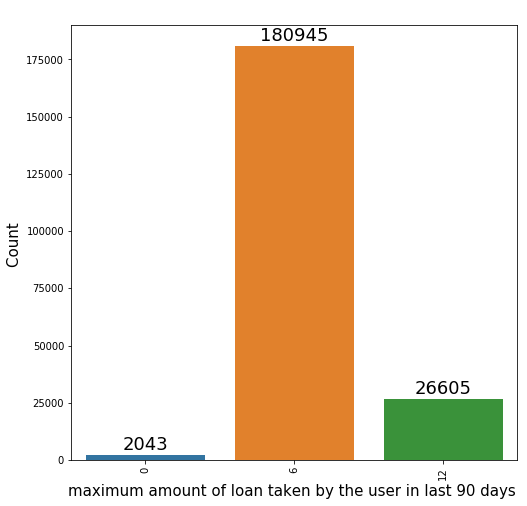

In [23]:
# Countplot of maximum amount of loan taken by the user in last 90 days .
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("maximum amount of loan taken by the user in last 90 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

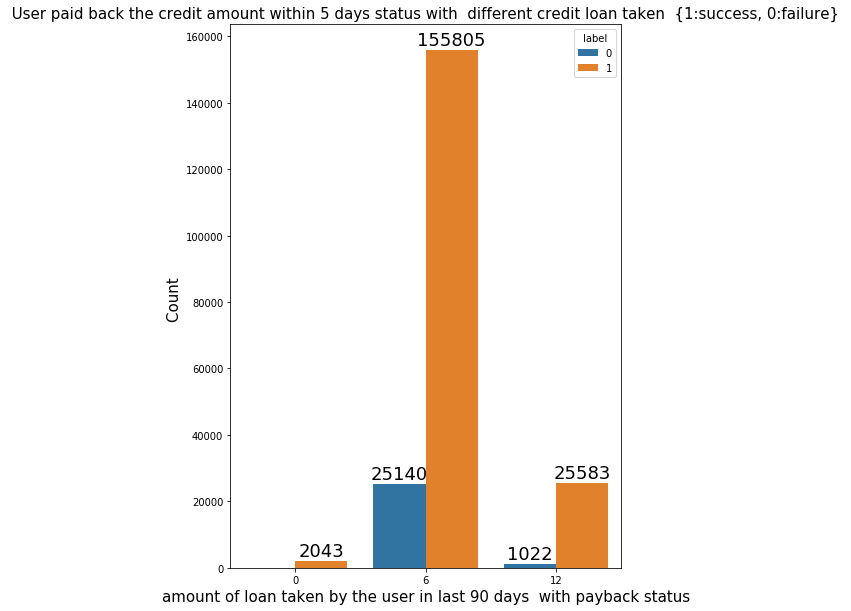

In [24]:
# Countplot of  user paid back the credit amount  within 5 days status with  different credit loan taken.
plt.figure(figsize=(7,10))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df1  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("amount of loan taken by the user in last 90 days  with payback status", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" User paid back the credit amount within 5 days status with  different credit loan taken  {1:success, 0:failure} " , size=15)
plt.show()

In [25]:
# droping Loan_ID column from Train dataset
df2= df1.drop(['msisdn','pdate' ,'pcircle'],axis = 1)

In [26]:
# Now we will  drop the columns which are highly correlated
df5= df2.drop(['daily_decr90','rental90','cnt_ma_rech30' ,'sumamnt_ma_rech30','payback90','amnt_loans90','medianmarechprebal30', 'medianamnt_ma_rech90', 'amnt_loans30','medianamnt_loans90'],axis = 1)

<function matplotlib.pyplot.show(*args, **kw)>

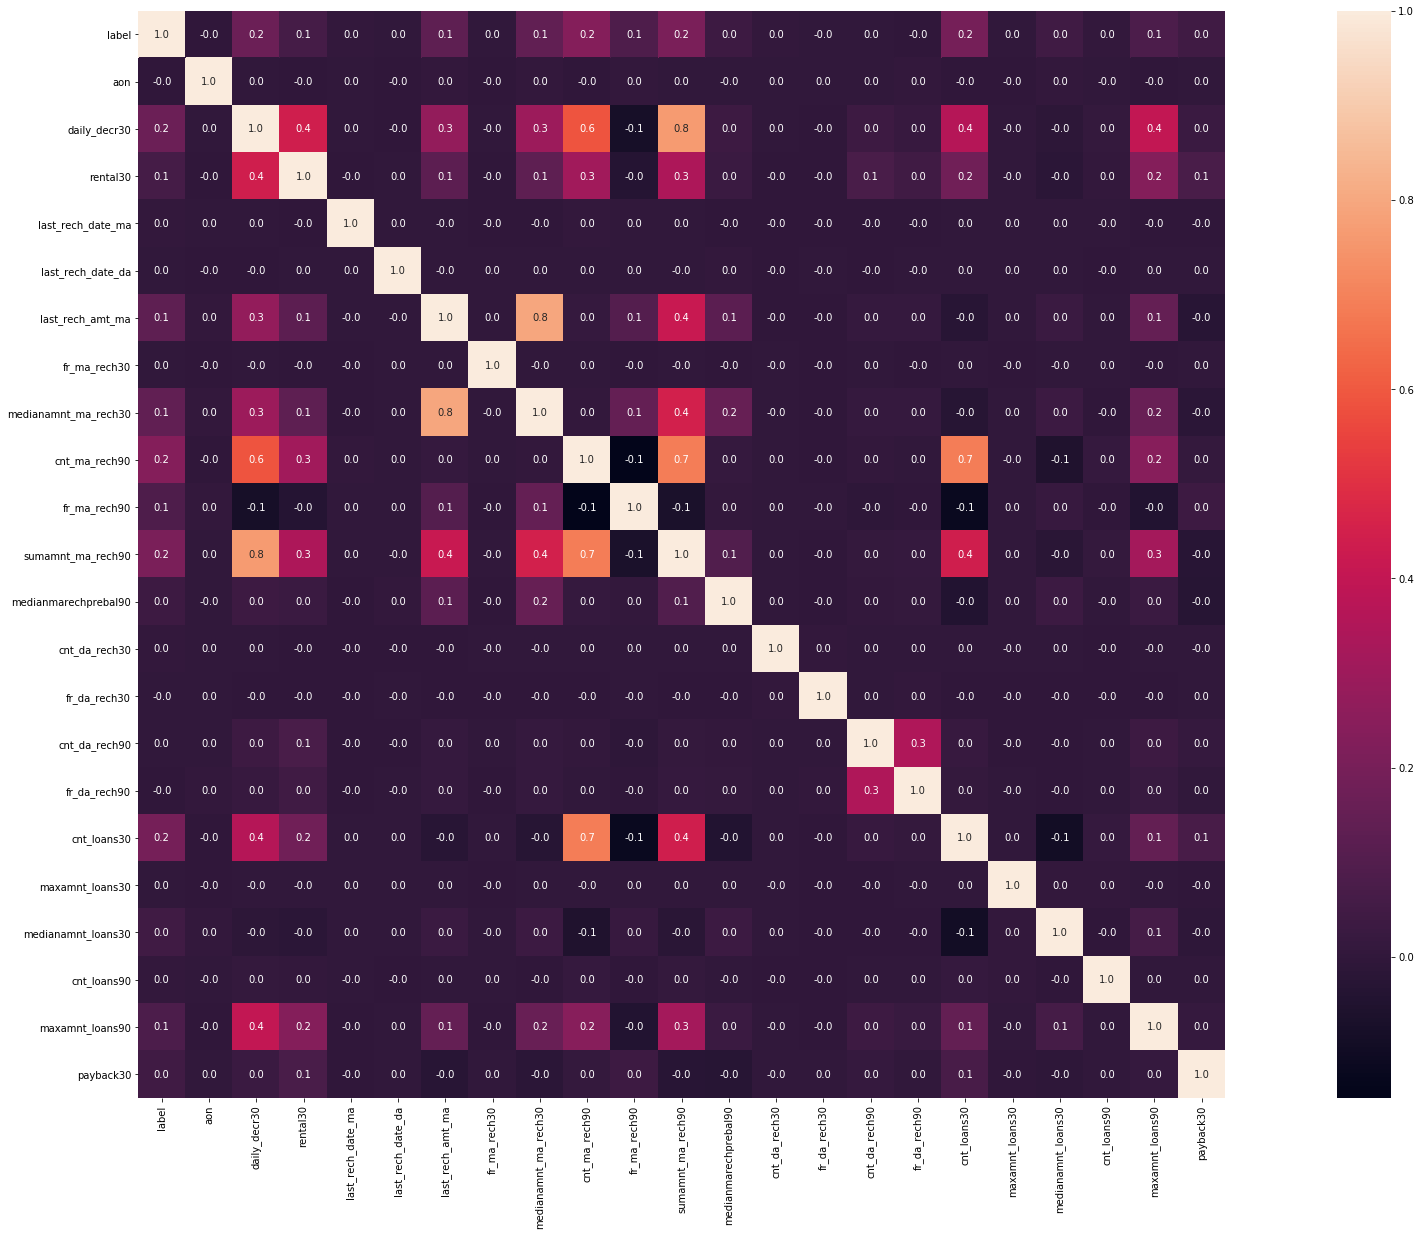

In [27]:
plt.figure(figsize=(40,20))
sns.heatmap(df5.corr(),annot=True,square=True,fmt=".1f")
plt.show

In [28]:
df5

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,21.0,1539.0,2,...,0.0,0.0,0,0,2,6.0,0.0,2.0,6,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,0.0,5787.0,1,...,0.0,0.0,0,0,1,12.0,0.0,1.0,12,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,1539.0,1,...,0.0,0.0,0,0,1,6.0,0.0,1.0,6,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.0,1,...,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,2309.0,8,...,0.0,0.0,0,0,7,6.0,0.0,7.0,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,2.0,3178.0,3,...,0.0,0.0,0,0,2,6.0,0.0,2.0,6,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,1.0,773.0,6,...,0.0,0.0,0,0,3,6.0,0.0,3.0,6,1.000000
209590,1,1013.0,11843.111667,5861.83,3.0,0.0,1539,8.0,1539.0,11,...,0.0,0.0,0,0,4,12.0,0.0,6.0,12,4.000000
209591,1,1732.0,12488.228333,411.83,2.0,38.0,773,4.0,773.0,6,...,0.0,0.0,1,0,2,12.0,0.0,3.0,12,0.000000


In [29]:
# Installing necessary library
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.4-py37_0 --> conda-forge::conda-4.9.2-py37h03978a9_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Calculating Zscore 
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [30]:
# Removing Outliners from  Dataset 
df3=df2[(z<3).all(axis=1)]

In [31]:
# Shape of the database 
df3.shape

(161465, 33)

# Splitting Data into target and Input

In [32]:
x=df3.iloc[:,1:-1]
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000


In [33]:
y=df3.iloc[:,0]
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 161465, dtype: int64

In [34]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


# Balancing Unbalanced Data 

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
from collections import Counter

In [37]:
os=RandomOverSampler(0.75)
x1,y1=os.fit_sample(x,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y1)))

The number of classes before fit Counter({1: 139065, 0: 22400})
The number of classes after fit Counter({1: 139065, 0: 104298})


# Importing Necessary libraries

In [40]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

# Finding Best random state of different algorithim

In [42]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x1,y1,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x1,y1,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x1,y1,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


The max accuracy score  for LogisticRegression   0.7621679370492881 is achieved at 56


The max accuracy score  for DecisionTreeClassifier  0.9450413987220841 is achieved at 78


The max accuracy score  for GaussianNB 0.7070449735993262 is achieved at 68




In [43]:


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x1,y1,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for AdaBoostClassifier 0.8008957738376513 is achieved at 68




# Using GridSearchCV to select best parameters

In [24]:
#Best parameters for Logistic Regression

lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


{'penalty': 'l2'}


{'criterion': 'entropy', 'max_features': 'sqrt'}






The model calculation for LogisticRegression(random_state=56) are:
[0 1 0 ... 1 1 0]
Accuracy Score=  0.7586546956218027
The CV Score is 0.8636732418790452

[[14942  5826]
 [ 5921 21984]]

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     20768
           1       0.79      0.79      0.79     27905

    accuracy                           0.76     48673
   macro avg       0.75      0.75      0.75     48673
weighted avg       0.76      0.76      0.76     48673



roc_auc_score 0.7533515742837863


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=78) are:
[0 1 0 ... 1 1 0]
Accuracy Score=  0.9420623343537485
The CV Score is 0.8615489424952777

[[20638  2595]
 [  225 25215]]

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     23233
           1       0.91      0.99

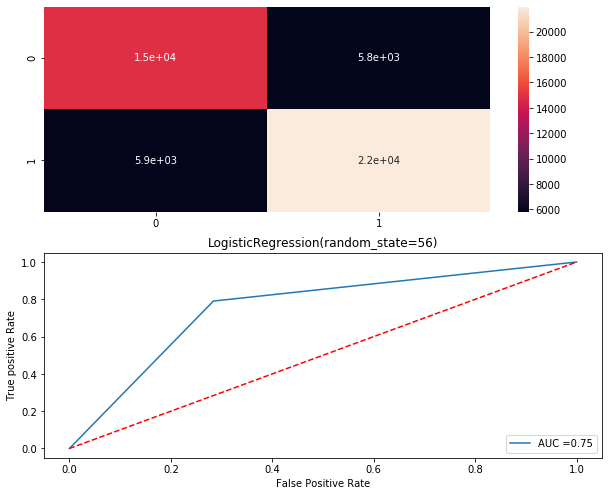

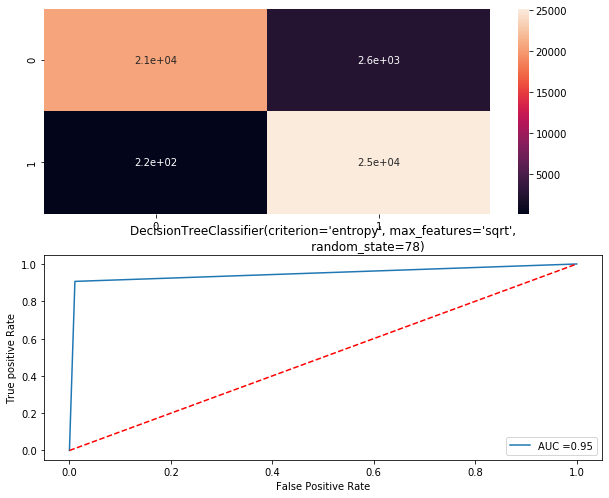

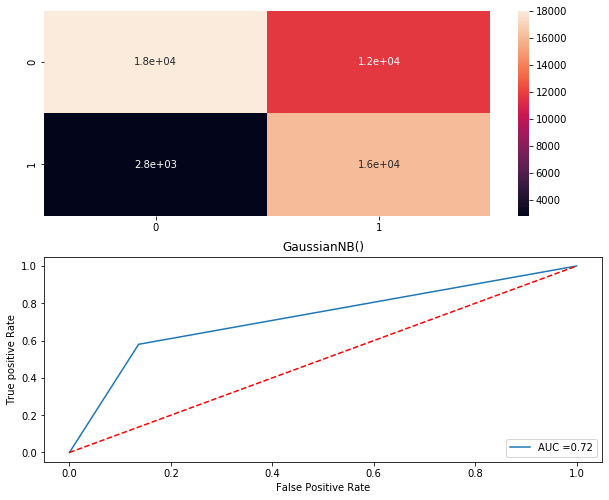

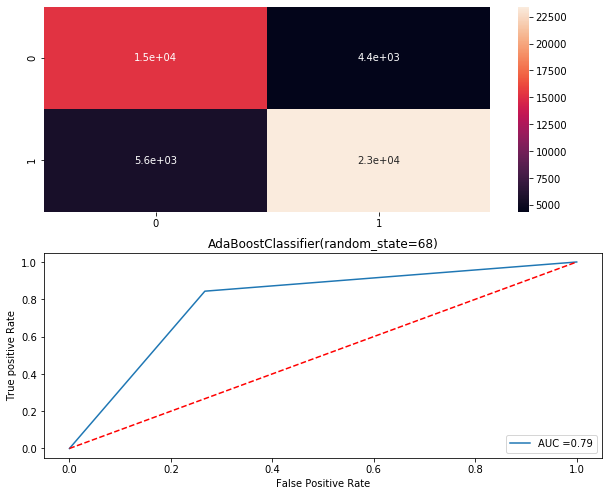

In [44]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 56 ),
          DecisionTreeClassifier(criterion ="entropy" , random_state= 78  , max_features = 'sqrt'),
          GaussianNB( ),AdaBoostClassifier( random_state= 68)]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")


# Since Decision tree Classifier is giving better result so we choose it as final model

In [51]:

dtc= DecisionTreeClassifier(criterion ="entropy" , random_state= 78  , max_features = 'sqrt')
dtc.fit(train_x,train_y)
predict=dtc.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(dtc,x1,y1,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)
F1=f1_score(predict,test_y)
print("F1 Score= " ,F1)
precision=precision_score(predict,test_y)
print("Precision Score= " ,precision)  
rec=recall_score(predict,test_y)
print("Recall Score= " ,rec)
                             

Accuracy Score= 0.9420623343537485
The CV Score is 0.9453655747570773
roc_auc_score 0.9479517994854292
F1 Score=  0.9470422535211267
Precision Score=  0.906688241639698
Recall Score=  0.9911556603773585


# Saving the model

In [52]:
import joblib

In [53]:
joblib.dump(dtc,"Micro_credit4.pkl")

['Micro_credit4.pkl']